<a href="https://colab.research.google.com/github/Red-Fleet/NeuralNetwork/blob/master/project_autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import torch.nn.functional as f
import numpy as np
from google.colab import files
import os
from collections import OrderedDict 

In [0]:
# Helper function for trainig of neural net
class NeuralHelper():
    
    def __init__(self, model, loss, optimizer):
        self.model = model
        self.loss = loss
        self.optimizer = optimizer
        self.train_loss_list = []
        self.valid_loss_list = []
        self.train_acc_list = []
        self.valid_acc_list = []
        
        pass
    
    def train(self, train_loader, valid_loader, epoch):
        for i in range(epoch):
            
            # traning network
            train_loss = 0
            train_acc = 0
            self.model.train()

            
            j = 0
            for input_data, target in train_loader:
                 # for printing  acc
                j = j+1
                #input_data , target = input_data.cuda(), target.cuda()
                input_data = input_data.cuda()
                target = input_data.clone().cuda()
                self.optimizer.zero_grad()
                output = self.model(input_data)
                loss_val = self.loss(output, target)
                
                loss_val.backward()
                self.optimizer.step()
                
                train_loss += loss_val.item()
                self.train_loss_list.append(loss_val.item())

                if(j%16 == 0):
                  print(loss_val.item())

                # x = self.accuracy(output, target)
                # train_acc += x
                # self.train_acc_list.append(x)
                
                


                pass
            
            self.train_loss_list.append(train_loss/len(train_loader))
            #self.train_acc_list.append(train_acc/len(train_loader))
            
            # validation
            
            valid_loss = 0
            valid_acc = 0
            
            with torch.no_grad():
                self.model.eval()
                
                for input_data, target in valid_loader:

                    #input_data , target = input_data.cuda(), target.cuda()
                    input_data = input_data.cuda()
                    target = input_data.clone().cuda()
                    output = self.model(input_data)
                    loss_val = self.loss(output, target)
                    
                    valid_loss += loss_val.item()
                    self.valid_loss_list.append(loss_val.item())

                    # x = self.accuracy(output, target)
                    # valid_acc += x
                    # self.valid_acc_list.append(x)
                    
                    pass
                pass

            
            self.valid_loss_list.append(valid_loss/len(valid_loader))
            #self.valid_acc_list.append(valid_acc/len(valid_loader))
            
            
            print("Epoch: {}/{}..".format(i+1, epoch))
            print("Traning loss = ", self.train_loss_list[-1])
            print("Validation loss = ", self.valid_loss_list[-1])
            # print("Train Accuracy = ", self.train_acc_list[-1])
            # print("Validation Accuracy = ", self.valid_acc_list[-1])

            
            pass
        pass
    
    def accuracy(self, output, target):
        
        top_p, top_class = output.topk(1, dim=1)
        equal = top_class == target.view(*top_class.shape)
        return (torch.mean(equal.type(torch.FloatTensor))).item()
    

    
    def forward(self, input_data):
        with torch.no_grad():
            self.model.eval()
            
            output =  self.model(input_data.cuda())
        return output
    
    def plot(self):
        plt.plot(self.train_loss_list, label = "Training loss")
        plt.plot(self.valid_loss_list, label = "Validation loss")
        plt.plot(self.train_acc_list, label = "Train Accuracy")
        plt.plot(self.valid_acc_list, label = "Validation Accuracy")
        plt.legend(frameon=False)
        
        
        pass
    
    def save(self, name):
        model_dict = {'model': self.model,
                      'loss': self.loss,
                      'optimizer': self.optimizer,
                      'state_dict': self.model.state_dict()}
        
        torch.save(model_dict, name)
        pass
    
    def load(self, name):
        
        self.load_model_dict = torch.load(name)
        
        #print('model = ', self.load_model_dict['model'])
        #print('loss = ', self.load_model_dict['loss'])
        #print('optimizer = ', self.load_model_dict['optimizer'])
        
        print(self.model.load_state_dict(self.load_model_dict['state_dict']))
        
        pass
    
        
    @staticmethod
    def load1(name):
        load_model_dict = torch.load(name)
        
        print('=> model = ', load_model_dict['model'])
        print('=> loss = ', load_model_dict['loss'])
        print('=> optimizer = ', load_model_dict['optimizer'])
        
        return load_model_dict['state_dict']
                
                
                

In [3]:

# download dataset
files.upload()

! sudo rm /root/'.kaggle'
!mkdir /root/'.kaggle'

!cp /content/kaggle.json /root/.kaggle/

!  kaggle datasets download -d prasunroy/natural-images 
! chmod 600 /root/.kaggle/kaggle.json


rm: cannot remove '/root/.kaggle': Is a directory
mkdir: cannot create directory ‘/root/.kaggle’: File exists
natural-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# unzip data

! unzip /content/natural-images.zip 

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflating: natural_images/cat/cat_0224.jpg  
  inflati

In [109]:
# loading data
transform = transforms.Compose([transforms.Resize((224,224)),
                                
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                               transforms.Normalize(mean=[0.5,0.5,0.5],
                                 std=[0.5,0.5,0.5])])

dataset = datasets.ImageFolder("/content/natural_images",
                                transform=transform)


dataset

Dataset ImageFolder
    Number of datapoints: 6899
    Root location: /content/natural_images
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
           )

In [0]:
#splitting and creation dataloader

train_dataset, valid_dataset = torch.utils.data.random_split(dataset, [6898, 1])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [0]:
# classes

classes = {dataset.class_to_idx[key]:key for key in dataset.class_to_idx }

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


airplane


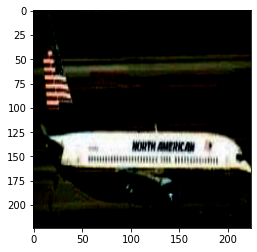

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


fruit


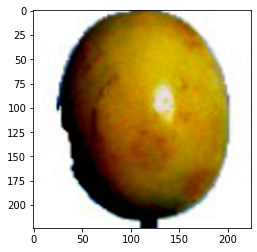

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


motorbike


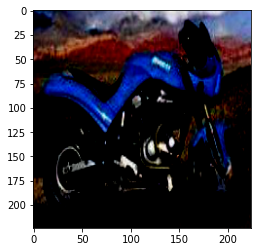

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


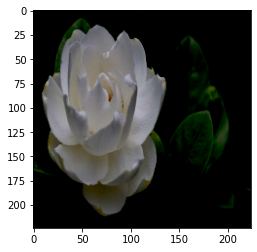

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


fruit


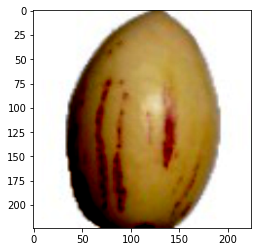

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


fruit


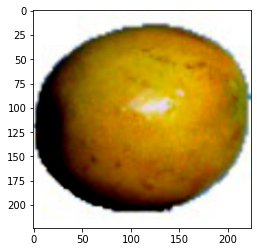

car


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


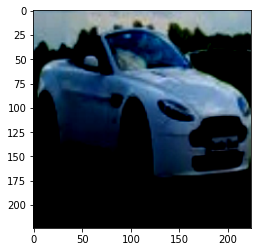

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


flower


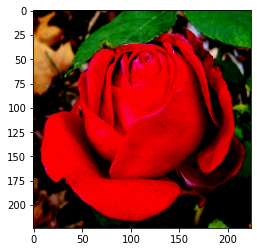

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


person


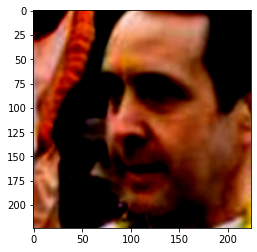

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


fruit


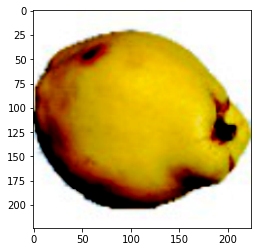

In [112]:
# visualize dataset
for images, labels in train_loader:
  for i in range(10):
    image = np.array(images[i]).transpose(1, 2, 0)
    print(classes[labels[i].item()])
    plt.imshow(image)
    plt.show()

  break

In [0]:
class Concat(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, tensor_list, dim):
        return torch.cat(tensor_list, dim=dim)
    
    pass

class Split(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, in_tensor, split_list, dim):
        return torch.split(in_tensor, split_list, dim)
    
    pass

class Quantize(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return torch.sign(x)
    pass

class Binarize(nn.Module):
    def __init__(self, input_channel, save_channel):
        super().__init__()
        self.tanh1 = nn.Tanh()
        self.quantize1 = Quantize()
        self.conv1 = nn.Conv2d(input_channel, save_channel, (3,3), stride=1, padding=1)
        self.tanh2 = nn.Tanh()
        self.quantize2 = Quantize()  # save model
        self.conv2 = nn.Conv2d(save_channel, input_channel, (3,3), stride=1, padding=1)
        self.tanh3 = nn.Tanh()

    def forward(self, x):
        x = self.tanh1(x)
        x = self.quantize1(x)
        x = self.conv1(x)
        x = self.tanh2(x)
        x = self.quantize2(x)
        x = self.conv2(x)
        x = self.tanh3(x)

        return x
    pass

class Add(nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, x, y):
        return x+y
    pass

class Fire(nn.Module):
    def __init__(self, squeeze_input_size, squeeze_output_size, expand1x1_output_size, expand3x3_output_size):
        super().__init__()
        # layers of neural net 
        
        
        self.squeeze = nn.Conv2d(squeeze_input_size, squeeze_output_size, kernel_size=(1, 1), stride=(1, 1))
        self.squeeze_activation = nn.ReLU(inplace=True)
        
        self.expand1x1 = nn.Conv2d(squeeze_output_size, expand1x1_output_size, kernel_size=(1, 1), stride=(1, 1))
        self.expand1x1_activation = nn.ReLU(inplace=True)
        
        self.expand3x3 = nn.Conv2d(squeeze_output_size, expand3x3_output_size, kernel_size=(3,3), stride=(1, 1), padding=(1, 1))
        self.expand3x3_activation = nn.ReLU(inplace=True)
        
        self.concat = Concat()
        pass
    
    def forward(self, x):
        
        x = self.squeeze(x)
        x = self.squeeze_activation(x)
        
        y = self.expand1x1(x)
        y = self.expand1x1_activation(y)
        
        z = self.expand3x3(x)
        z = self.expand3x3_activation(z)
        
        return self.concat((y,z), dim=1)
      
    pass

class FireTranspose(nn.Module):
    def __init__(self, expand1x1_input_size, expand3x3_input_size, squeeze_input_size, squeeze_output_size):
        super().__init__()
        
        self.expand1x1_input_size = expand1x1_input_size
        self.expand3x3_input_size = expand3x3_input_size
        
        # layers of neural net 
        self.split = Split()
        self.expand1x1 = nn.Conv2d(expand1x1_input_size, squeeze_input_size, kernel_size=(1, 1), stride=(1, 1))
        self.expand1x1_activation = nn.ReLU(inplace=True)
        
        self.expand3x3 = nn.Conv2d(expand3x3_input_size, squeeze_input_size, kernel_size=(3,3), stride=(1, 1), padding=(1, 1))
        self.expand3x3_activation = nn.ReLU(inplace=True)
        
        self.add = Add()
        self.squeeze = nn.Conv2d(squeeze_input_size, squeeze_output_size, kernel_size=(1, 1), stride=(1, 1))
        self.squeeze_activation = nn.ReLU(inplace=True)
        
        pass
    
    def forward(self, x):
        y, z = self.split(x, (self.expand1x1_input_size, self.expand3x3_input_size), dim=1)
        
        y = self.expand1x1(y)
        y = self.expand1x1_activation(y)
        
        z = self.expand3x3(z)
        z = self.expand3x3_activation(z)
        
        w = self.add(y, z)
        w = self.squeeze(w)
        w = self.squeeze_activation(w)
    
        return w
      
    pass


class  Enhancer(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.l1 = nn.Conv2d(3, 6, kernel_size=(3,3), stride=(1,1), padding=1)
    self.l2 = nn.Conv2d(3,6, kernel_size=(5,5), stride=(1,1),padding=2)
    self.l3 = nn.Conv2d(3,6, kernel_size=(7,7), stride=(1,1),padding=3)
    self.relu = nn.ReLU()
    self.concat = Concat()
    self.l4 = nn.Conv2d(18, 3, kernel_size=(1,1), stride=(1,1))
    self.tanh = nn.Tanh()
    pass

  def forward(self, x):
    x1 = self.relu(self.l1(x))
    x2 = self.relu(self.l1(x))
    x3 = self.relu(self.l1(x))
    x = self.concat((x1, x2, x3), dim=1)
    
    
    x = self.tanh(self.l4(x))

    return x

# original
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        
        squeezenet = models.squeezenet1_1(pretrained=True)
        self.l0 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
        self.l0.load_state_dict(squeezenet.features[0].state_dict())
        
        self.l1 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l2 = nn.Conv2d(64, 64, kernel_size=(3,3), stride=(2, 2))#nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)
        self.l3 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l4 = Fire(64, 16, 64, 64)
        self.l4.load_state_dict(squeezenet.features[3].state_dict())
        
        self.l5 = Fire(128, 16, 64, 64)
        self.l5.load_state_dict(squeezenet.features[4].state_dict())
        
        self.l6 = nn.Conv2d(128, 128, kernel_size=(3,3), stride=(2, 2))#nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True)
        self.l7 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l8 = Fire(128, 32, 128, 128)
        self.l8.load_state_dict(squeezenet.features[6].state_dict())
        self.l9 = Fire(256, 32, 128, 128)
        self.l9.load_state_dict(squeezenet.features[7].state_dict())
        self.l10 = nn.Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
        self.l11 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l12 = Binarize(128, 64)
        self.l13 = nn.Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
        self.l14 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l15 = FireTranspose(128, 128, 32, 256)
        self.l16 = FireTranspose(128, 128, 32, 128)
        self.l17 = nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2)
        self.l18 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l19 = FireTranspose(64, 64, 16, 128)
        self.l20 = FireTranspose(64, 64, 16, 64)
        self.l21 = nn.ConvTranspose2d(64, 64, kernel_size=3, stride=2)
        self.l22 = nn.LeakyReLU(inplace=True, negative_slope=0.2)#nn.ReLU(inplace=True)
        self.l23 = nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2)
        self.l24 = nn.Tanh()
        

    def forward(self, x):
        
        x = self.l0(x)
        x = self.l1(x)
        #x1 = x
        x = self.l2(x)
        x = self.l3(x)
        x = self.l4(x)
        x = self.l5(x)
        #x5 = x
        x = self.l6(x)
        x = self.l7(x)
        x = self.l8(x)
        x = self.l9(x)
        #x9 = x
        x = self.l10(x)
        x = self.l11(x)
        x = self.l12(x)
        x = self.l13(x)
        x = self.l14(x)
        #x = 0.00001*x9 + 0.99999*x
        x = self.l15(x)
        x = self.l16(x)
        x = self.l17(x)
        x = self.l18(x)
        #x = 0.01*x5 + 0.99*x
        x = self.l19(x)
        x = self.l20(x)
        x = self.l21(x)
        x = self.l22(x)
        #x = 0.01*x1 + 0.99*x
        x = self.l23(x)
        x = self.l24(x)
        return x
    







In [0]:
new_mod = nn.Sequential(Autoencoder(), Enhancer())
loss = nn.MSELoss()
optimizer = optim.Adam(new_mod.parameters(), lr=0.002)
model = NeuralHelper(new_mod, loss, optimizer)
afdfgf = model.model.cuda()
encoder = NeuralHelper(model.model[0],  loss, optimizer)
enhancer = NeuralHelper(model.model[1],  loss, optimizer)

In [39]:
# test run
images, labels  = next(iter(train_loader))
import time
t1 = time.time()
out = model.model(images.cuda())
print(time.time()-t1)
out.shape

0.00893092155456543


torch.Size([32, 3, 224, 224])

In [0]:
# freze traning weight in feature layer


for layers in encoder.model.parameters():
  layers.requires_grad = True

for layers in enhancer.model.parameters():
  layers.requires_grad = True


for layers in model.model.parameters():
  print(layers.requires_grad)
    

In [14]:
# upload and load model

Saving bestmodx9 to bestmodx9


In [115]:
# train 
t1 = time.time()
model.train(train_loader, valid_loader, 10)

print(time.time()-t1)

0.02402643859386444
0.023015500977635384
0.023702472448349
0.022317172959446907
0.024193603545427322
0.0232774056494236
0.028848977759480476
0.020021775737404823
0.02733033336699009
0.025141876190900803
0.019721442833542824
0.022160815075039864
0.02086140215396881
Epoch: 1/10..
Traning loss =  0.024542997298003348
Validation loss =  0.011826020665466785
0.022839436307549477
0.024234384298324585
0.028143223375082016
0.02424660511314869
0.024006910622119904
0.019246499985456467
0.023156756535172462
0.024660911411046982
0.021887561306357384
0.02273007668554783
0.024852294474840164
0.024350425228476524
0.02496289648115635
Epoch: 2/10..
Traning loss =  0.024399396946170816
Validation loss =  0.012439513579010963
0.020928997546434402
0.025606505572795868
0.02303299307823181
0.025862345471978188
0.023284148424863815
0.02037564106285572
0.023025214672088623
0.02048136480152607
0.02089609205722809
0.0228645671159029
0.024160223081707954
0.02006017602980137
0.02703573741018772
Epoch: 3/10..
Tran

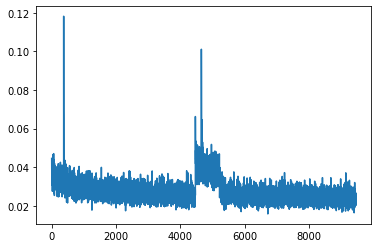

In [116]:
plt.plot(model.train_loss_list)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


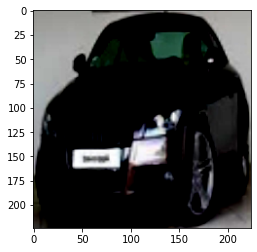

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


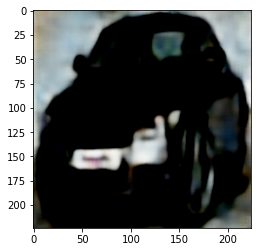

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


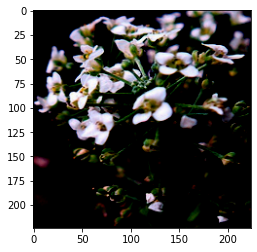

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


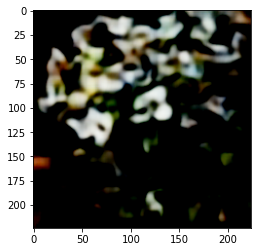

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


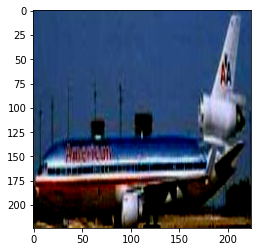

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


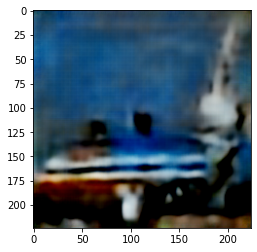

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


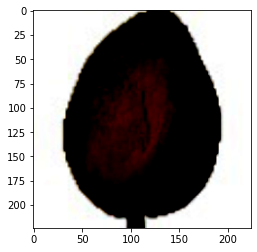

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


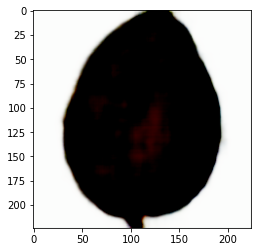

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


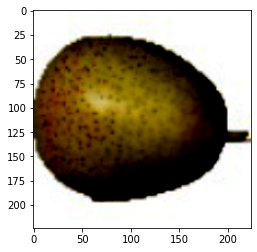

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


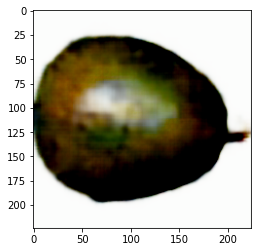

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


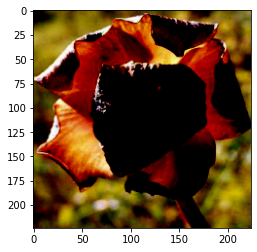

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


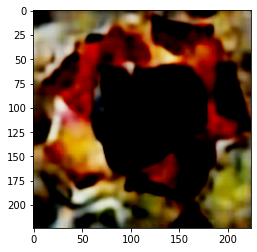

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


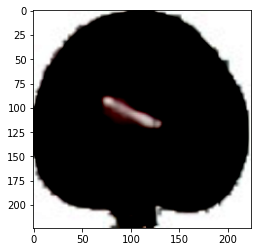

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


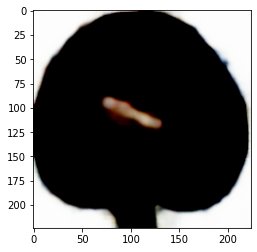

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


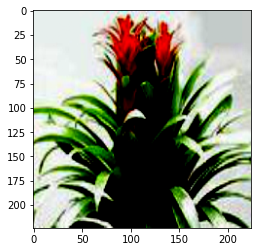

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


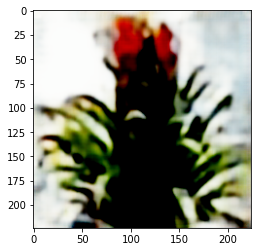

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


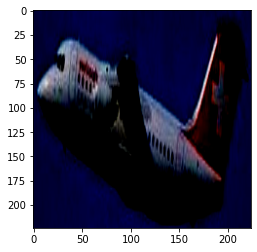

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


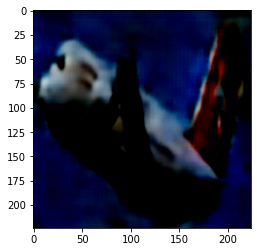

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


new img


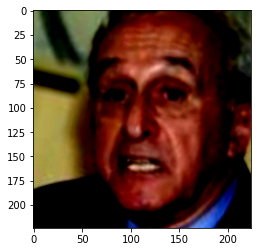

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


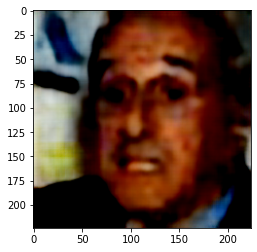

In [118]:
# model output
images, labels  = next(iter(train_loader))


out = model.model(images.cuda())


for i in range(10):
  print("new img")
  image = np.array(images[i]).transpose(1, 2, 0)
  plt.imshow(image)
  plt.show()

  image = np.array(out[i].cpu().detach().numpy()).transpose(1, 2, 0)
  plt.imshow(image)
  plt.show()





/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Fire. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Concat. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Binarize. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/di

In [120]:
# saving model
encoder.save("encoder")
enhancer.save("enhancer")
model.save("model")


jhh


/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Fire. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Concat. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Binarize. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/di

In [121]:
os.listdir(".")

['.config',
 'natural-images.zip',
 'bestmodx_1',
 'natural_images',
 'enhancer',
 'encoder',
 'bestmodx9',
 'model',
 'data',
 'newdata',
 'bestmodx_3',
 'kaggle.json',
 'bestmodx_5',
 'sample_data']

In [0]:
#downloading model
files.download('encoder')

In [0]:
# downloading model
files.download('enhancer')

In [0]:
# downloading model
files.download('model')